In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
## 导入工具
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

In [3]:
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split # 切分数据
from sklearn.metrics import mean_squared_error #评价指标

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [4]:
data_file = "./card_transdata.csv"
data = pd.read_csv(data_file, sep=',', encoding='utf-8')

In [8]:
from sklearn.model_selection import train_test_split
X = data.drop('fraud', axis=1)
y = data.fraud #将fraud列单独摘出
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr_y_predict=lr.predict(X_test)
#从sklearn.metrics里导入classification_report模块
from sklearn.metrics import classification_report
#使用逻辑斯蒂回归墨香自带的评分函数score获得模型在测试集上的准确性结果
print('Accuracy of LR Classifier:',lr.score(X_test,y_test))

Accuracy of LR Classifier: 0.9576866666666667


# 模型训练

## 随机森林

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [9]:
param_grid = {'n_estimators':np.arange(100,200,10),
              'max_depth':np.arange(3,20,1),
              'min_samples_split':np.arange(2,2+20,2),
             }

In [7]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [11]:
import joblib
joblib.dump(rf,"./rf.pkl")

['./rf.pkl']

In [ ]:
print(GS.best_params_)
print(GS.best_score_) 

## LogisticRegression

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
penaltys = ['l1','l2']
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
tuned_parameters = dict(penalty = penaltys, C = Cs)
 
lr_penalty= LogisticRegression()
grid= GridSearchCV(lr_penalty, tuned_parameters,cv=5, scoring='neg_log_loss')
grid.fit(X_train,y_train)
lr=LogisticRegression(C=grid.best_params_["C"],penalty = grid.best_params_["penalty"])


In [13]:
lr.fit(X_train,y_train)


LogisticRegression(random_state=0)

In [14]:
joblib.dump(lr,"./lr.pkl")

['./lr.pkl']

# svc

In [19]:
from sklearn.svm import SVC
tuned_parameters = {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]
                   }
grid= GridSearchCV(SVC(), tuned_parameters,cv=5, scoring='neg_log_loss')
grid.fit(X_train,y_train)
SVC = SVC(kernel=grid.best_params_["kernel"],gamma =grid.best_params_["gamma"] 0,probability=True,C = grid.best_params_["C"],)

In [ ]:
SVC.fit(X_train,y_train)

In [ ]:
import joblib
joblib.dump(SVC,"./SVC.pkl")

# KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier 
param_grid = [
    {
        "weights":["uniform"],
        "n_neighbors":[i for i in range(1,11)]
    },
    {
        "weights":["distance"],
        "n_neighbors":[i for i in range(1,11)]
    }
]
knn_clf = KNeighborsClassifier()
#网格搜素的对象
#n_jobs指的是使用计算机的几个核,verbose是训练过程中的输出
grid_search = GridSearchCV(knn_clf,param_grid,cv=5,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

KNN = KNeighborsClassifier(weights = grid.best_params_["weights"],n_neighbors =grid.best_params_["n_neighbors"] )
KNN.fit(X_train,y_train)
joblib.dump(KNN,"./KNN.pkl")

['./KNN.pkl']

# DecisionTreeClassifier

In [13]:
from sklearn import tree
param_grid = {
        'criterion': ['entropy','gini'],
        'max_depth': [3, 4, 5, 6, 7, 8],
        'min_samples_split': [4,5,6,7,8,9, 12, 16, 20, 24]
        }
clf =DecisionTreeClassifier()
grid_search = GridSearchCV(clf,param_grid,cv=5,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)
DecisionTreeClassifier = tree.DecisionTreeClassifier(criterion=grid.best_params_['criterion']max_depth =grid.best_params_["max_depth"] ,max_leaf_nodes = grid.best_params_["max_leaf_nodes"])
DecisionTreeClassifier.fit(X_train,y_train)
joblib.dump(DecisionTreeClassifier,"./DecisionTreeClassifier.pkl")

['./DecisionTreeClassifier.pkl']

# GradientBoostingClassifier

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {"n_estimators":np.range(100,200,10),
             "learning_rate":np.range(0.01,1,0.05),
             "max_depth"=np.range(1,10,1)} 
clf =GradientBoostingClassifier()
#网格搜素的对象
#n_jobs指的是使用计算机的几个核,verbose是训练过程中的输出
grid_search = GridSearchCV(clf,param_grid,cv=5,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)
GradientBoostingClassifier = GradientBoostingClassifier(learning_rate=grid.best_params_["learning_rate"],
                                                        n_estimators=grid.best_params_["n_estimators"],
                                                       max_depth= grid.best_params_["max_depth"])
GradientBoostingClassifier.fit(X_train,y_train)
joblib.dump(GradientBoostingClassifier,"./GradientBoostingClassifier.pkl")

['./GradientBoostingClassifier.pkl']

# AdaBoostClassifier

In [15]:
from sklearn.ensemble import  AdaBoostClassifier 
param_grid = {"n_estimators":np.range(100,200,10),
             "learning_rate":np.range(0.01,1,0.05),
             "max_depth"=np.range(1,10,1)} 
    
clf =AdaBoostClassifier ()
#网格搜素的对象
#n_jobs指的是使用计算机的几个核,verbose是训练过程中的输出
grid_search = GridSearchCV(clf,param_grid,cv=5,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)
AdaBoostClassifier = AdaBoostClassifier(learning_rate=grid.best_params_["learning_rate"],n_estimators=grid.best_params_["n_estimators"],max_depth= grid.best_params_["max_depth"])
AdaBoostClassifier.fit(X_train,y_train)
joblib.dump(AdaBoostClassifier,"./AdaBoostClassifier.pkl")

['./AdaBoostClassifier.pkl']

# GaussianNB



In [16]:
from sklearn.naive_bayes import GaussianNB
GaussianNB = GaussianNB()
GaussianNB.fit(X_train,y_train)
joblib.dump(GaussianNB,"./GaussianNB.pkl")              

['./GaussianNB.pkl']

# Quadratic Discriminant Analysis

In [17]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
QuadraticDiscriminantAnalysis = QuadraticDiscriminantAnalysis()
QuadraticDiscriminantAnalysis.fit(X_train,y_train)
joblib.dump(QuadraticDiscriminantAnalysis,"./QuadraticDiscriminantAnalysis.pkl")  

['./QuadraticDiscriminantAnalysis.pkl']

In [ ]:
print(classification_report(y_test,lr_y_predict))

In [90]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
#我们的数据是样本不平衡的，参数为weighted可以帮助解决样本不平衡的问题
precision = precision_score(y_test,lr_y_predict, average='weighted') 
recall = recall_score(y_test,lr_y_predict, average='weighted')
f1score = f1_score(y_test,lr_y_predict, average='weighted')

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,lr_y_predict)

array([[271683,   2024],
       [ 10670,  15623]], dtype=int64)

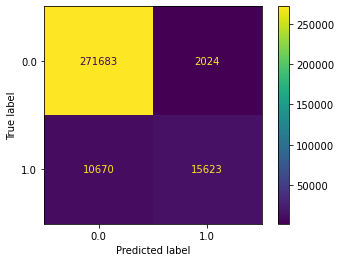

In [17]:
#混淆矩阵可视化
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr, X_test, y_test)  
plt.show()

In [24]:
from sklearn.metrics import roc_auc_score as AUC
area =AUC(y_test,lr.decision_function(X_test))
print(area)

0.967858090032989


# 模型评价指标

In [36]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn import metrics
from matplotlib import pyplot
from numpy import argmax
from functools import reduce


In [38]:
def find_optimal_cutoff(tpr,fpr,threshold):
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = threshold[optimal_idx]
    return optimal_threshold


In [48]:
def best_confusion_matrix(y_test, y_test_predprob):
    fpr, tpr, thresholds = roc_curve(y_test, y_test_predprob, pos_label=1)
    cutoff = find_optimal_cutoff(tpr,fpr,thresholds)
    y_pred = list(map(lambda x:1 if x>=cutoff else 0,y_test_predprob))
    TN,FP,FN,TP = confusion_matrix(y_test,y_pred).ravel()
    return cutoff,TN,FN,FP,TP


In [97]:
def evaluation(clf,X_train,y_train,X_test,y_test,modelname,digits):
    """
        计算各个模型评价指标
        
        Args:
            clf：已经fit好的模型
            X_train,y_train,X_test,y_test:	训练和测试数据集
            modelname：模型名称，为了表格的绘制
            digits：各个评价指标需要保留的位数
        Returns:
            返回单个模型评价指标表格
        """
    
    y_train_predprob = clf.predict_proba(X_train)[:, 1]
    train_auc = round(roc_auc_score(y_train, y_train_predprob),digits)

    y_test_predprob = clf.predict_proba(X_test)[:, 1]
    test_auc = round(roc_auc_score(y_test, y_test_predprob),digits)
    
    train_cutoff, TN1,FN1,FP1,TP1 = best_confusion_matrix(y_train,y_train_predprob)
    test_cutoff, TN2,FN2,FP2,TP2 = best_confusion_matrix(y_test,y_test_predprob)

    #Sen Spe
    recall,specificity= round(TP2/(TP2+FN2),digits), round(TN2/(FP2+TN2),digits)
 
    #PPV NPV
    npv,ppv = round(TN2/(FN2+TN2),digits),round(TP2/(TP2+FP2),digits)
    
    #PLR NLR
    plr,nlr = round((TP2/(TP2+FN2))/(FP2/(FP2+TN2)),digits),round((FN2/(TP2+FN2))/(TN2/(FP2+TN2)),digits)
    
    #F1值
    y_test_pred=list(map(lambda x:1 if x>=test_cutoff else 0,y_test_predprob))
    f1 = round(f1_score(y_test, y_test_pred),digits)
    
    #Youden Index
    youden = round(TP2/(TP2+FN2)+TN2/(FP2+TN2)-1,digits)

    #MCC
    mcc = round(sklearn.metrics.matthews_corrcoef(y_test, y_test_pred),digits)
    
    #Kappa
    kappa =round(sklearn.metrics.cohen_kappa_score(y_test_pred, y_test),digits)

    #Precison
    precison= round(precision_score(y_test,y_test_pred),digits)
  
    eval_df = {'Model': ['Train_AUC','Test_AUC','Specificity','Recall',"Precision",'F1','Youden Index','MCC','Kappa','NPV','PPV','PLR','NLR'], "Name": [train_auc, test_auc,specificity,recall,precison,f1,youden,mcc,kappa,npv,ppv,plr,nlr]}
    eval_df = pd.DataFrame(data=eval_df)

    return eval_df


In [62]:
import sklearn

In [93]:
res_lr=evaluation(lr,X_train,y_train,X_test,y_test,"LR",2)
res_rf=evaluation(rf,X_train,y_train,X_test,y_test,"rf",2)


frames = [res_lr,res_rf]
res_df = reduce(lambda df1,df2: pd.merge(df1,df2,on='Model'), frames)


In [ ]:
#将表格保存为csv格式文件
res_df.to_csv('model_evaluation.csv',encoding = 'utf_8_sig')

In [94]:
res_df.columns = ["指标","LogisticRegression","RandomForestClassifier"]

In [95]:
res_df

,指标,LogisticRegression,RandomForestClassifier
0,train_auc,0.97,1.0
1,test_auc,0.97,1.0
2,specificity,0.92,1.0
3,sensitivity,0.93,1.0
4,precision,0.54,1.0
5,F1,0.68,1.0
6,Youden Index,0.85,1.0
7,MCC,0.67,1.0
8,Kappa,0.64,1.0
9,npv,0.99,1.0


# ROC曲线

In [87]:
 def multi_models_roc(names, sampling_methods, colors, X_test, y_test, save=True, dpin=100):
        """
        将多个机器模型的roc图输出到一张图上
        
        Args:
            names: list, 多个模型的名称
            sampling_methods: list, 多个模型的实例化对象
            save: 选择是否将结果保存（默认为png格式）
            
        Returns:
            返回图片对象plt
        """
        plt.figure(figsize=(20, 20), dpi=dpin)

        for (name, method, colorname) in zip(names, sampling_methods, colors):
            
            y_test_preds = method.predict(X_test)
            y_test_predprob = method.predict_proba(X_test)[:,1]
            fpr, tpr, thresholds = roc_curve(y_test, y_test_predprob, pos_label=1)
            
            plt.plot(fpr, tpr, lw=5, label='{} (AUC={:.3f})'.format(name, auc(fpr, tpr)),color = colorname)
            plt.plot([0, 1], [0, 1], '--', lw=5, color = 'grey')
            plt.axis('square')
            plt.xlim([0, 1])
            plt.ylim([0, 1])
            plt.xlabel('False Positive Rate',fontsize=20)
            plt.ylabel('True Positive Rate',fontsize=20)
            plt.title('ROC Curve',fontsize=25)
            plt.legend(loc='lower right',fontsize=20)

        if save:
            plt.savefig('multi_models_roc.png')
            
        return plt


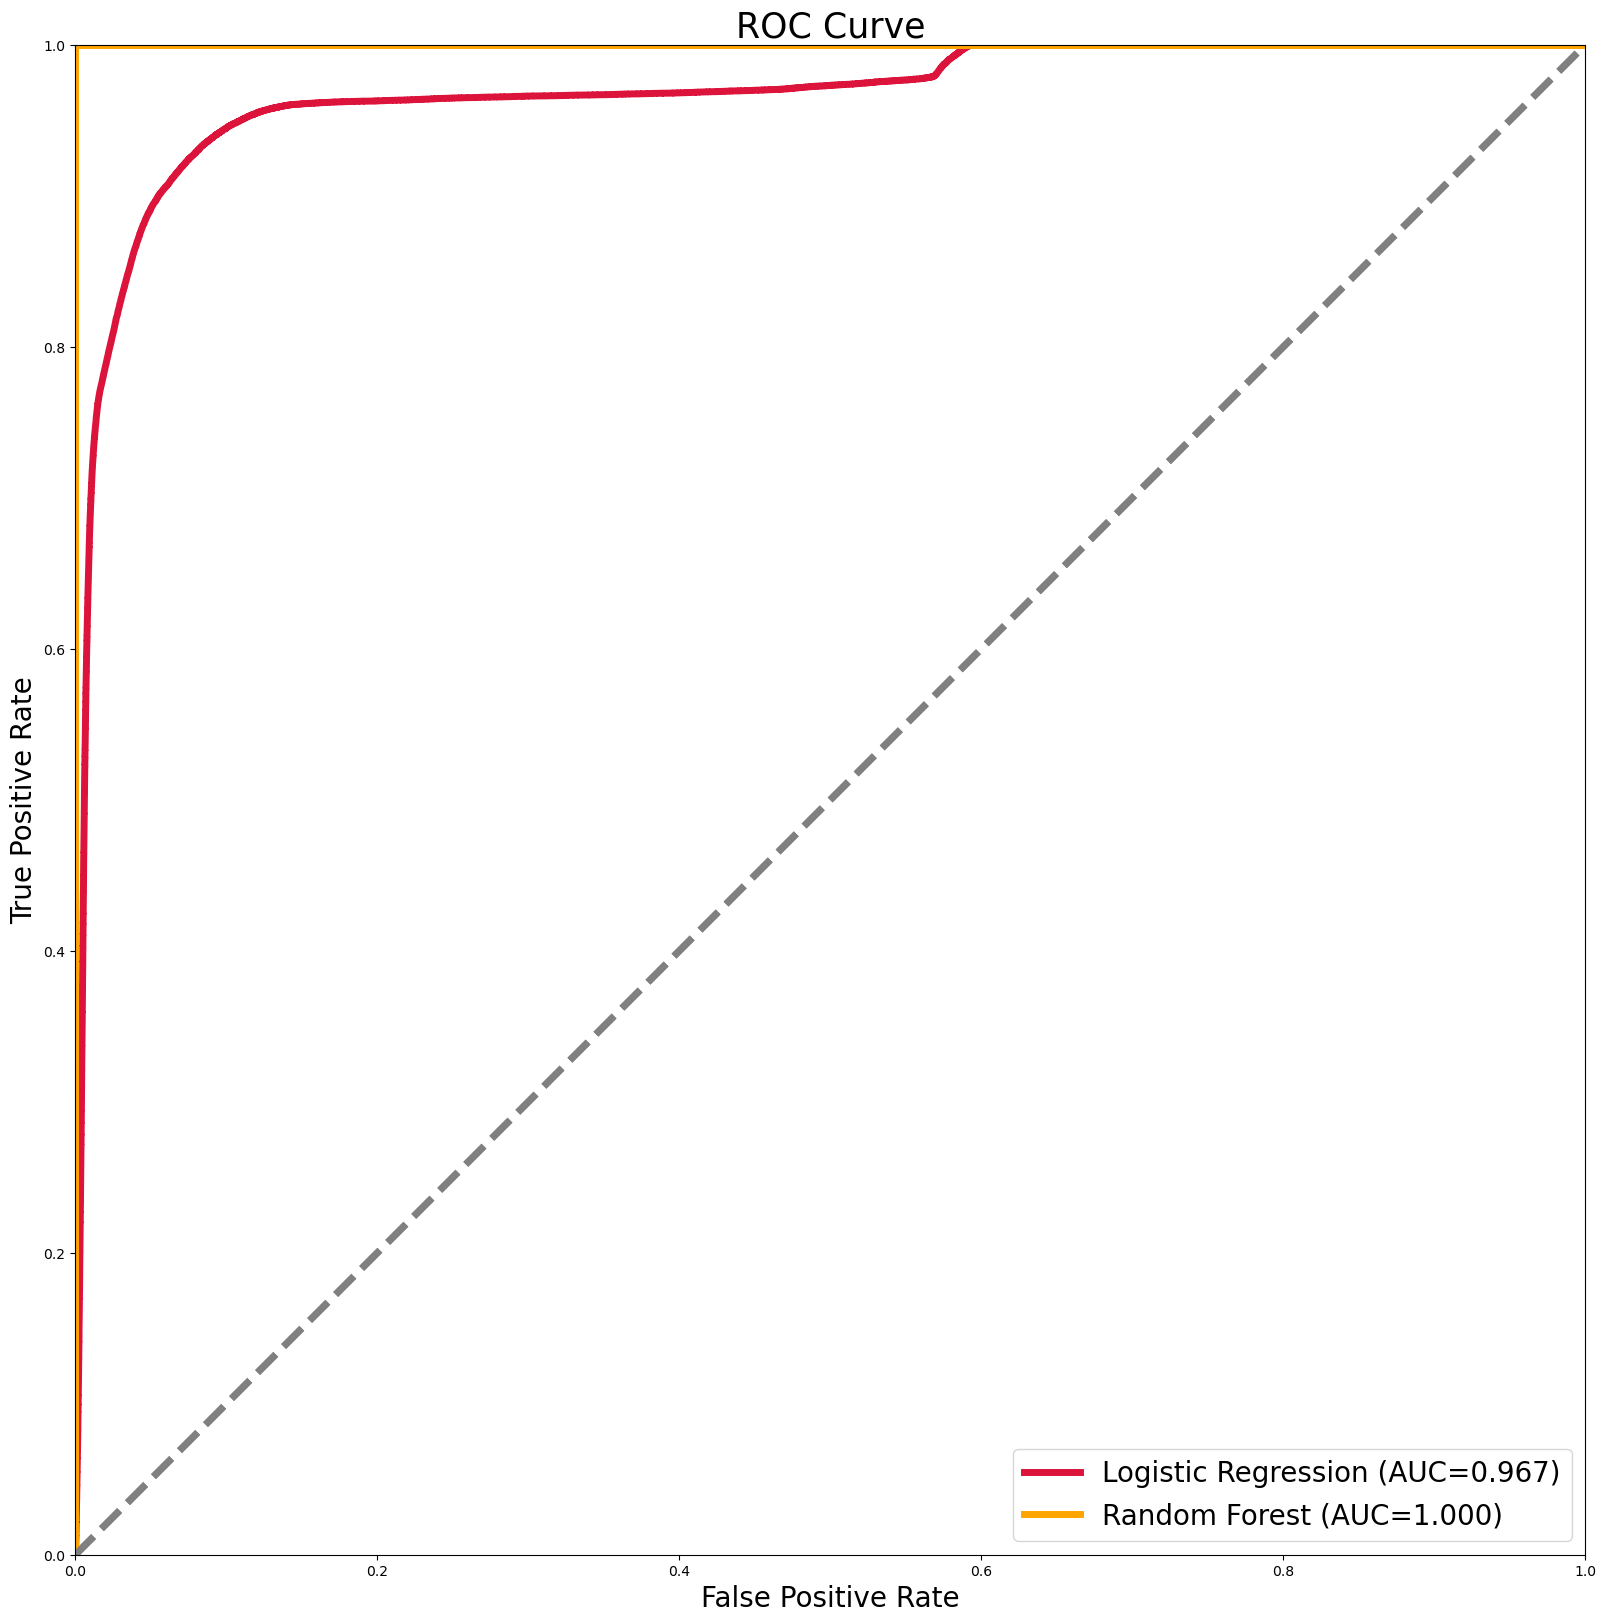

In [89]:
names = ['Logistic Regression',
         'Random Forest'
        ]

sampling_methods = [lr,
                    rf
                   ]

colors = ['crimson','orange',"brown","chocolate","gold","lawngreen","cyan","dodgerblue","b"
         ]

#ROC curves
train_roc_graph = multi_models_roc(names, sampling_methods, colors, X_train, y_train, save = True)
train_roc_graph.savefig('ROC_Train_all.png')


In [ ]:
from sklean.externals import joblib
joblib.dump(lr,"./tmp/test.pkl")